In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# Load dataset
file_path = 'customer_feedback_satisfaction.csv'
Customer_data = pd.read_csv(file_path)

In [3]:
# Few rows of dataset
Customer_data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [4]:
# Dataset info
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [5]:
# Function to display basic descriptive statistics
def basic_statistics(Customer_data):
    print("Descriptive Statistics:")
    
print(Customer_data.describe())

         CustomerID           Age         Income  ProductQuality  \
count  38444.000000  38444.000000   38444.000000    38444.000000   
mean   19222.500000     43.496853   75076.619238        5.494746   
std    11097.971211     14.972748   25975.752966        2.873192   
min        1.000000     18.000000   30001.000000        1.000000   
25%     9611.750000     31.000000   52624.500000        3.000000   
50%    19222.500000     43.000000   75236.000000        5.000000   
75%    28833.250000     56.000000   97606.750000        8.000000   
max    38444.000000     69.000000  119999.000000       10.000000   

       ServiceQuality  PurchaseFrequency  SatisfactionScore  
count    38444.000000       38444.000000       38444.000000  
mean         5.492769          10.453881          85.276409  
std          2.875812           5.765621          16.898577  
min          1.000000           1.000000           4.280000  
25%          3.000000           5.000000          74.470000  
50%          5.

In [6]:
# Correlation of statistics
print(Customer_data.corr())

                   CustomerID       Age    Income  ProductQuality  \
CustomerID           1.000000  0.001566 -0.004450       -0.003851   
Age                  0.001566  1.000000 -0.000097       -0.009215   
Income              -0.004450 -0.000097  1.000000       -0.001607   
ProductQuality      -0.003851 -0.009215 -0.001607        1.000000   
ServiceQuality       0.009427  0.004847  0.005130        0.005206   
PurchaseFrequency    0.005245 -0.003799  0.001219        0.000060   
SatisfactionScore    0.004160  0.157510  0.245129        0.547690   

                   ServiceQuality  PurchaseFrequency  SatisfactionScore  
CustomerID               0.009427           0.005245           0.004160  
Age                      0.004847          -0.003799           0.157510  
Income                   0.005130           0.001219           0.245129  
ProductQuality           0.005206           0.000060           0.547690  
ServiceQuality           1.000000           0.006110           0.553614  
Pur

In [7]:
# Function to calculate and display major moments (mean, median, std dev, skewness, kurtosis)
def calculate_moments(Customer_data):
    # Select only numeric columns
    numeric_data = Customer_data.select_dtypes(include=['float64', 'int64'])
    
    moments = {
        'Mean': numeric_data.mean(),
        'Median': numeric_data.median(),
        'Standard Deviation': numeric_data.std(),
        'Skewness': numeric_data.apply(skew),
        'Kurtosis': numeric_data.apply(kurtosis)
    }
    moments_df = pd.DataFrame(moments)
    print("\nMajor Moments:")
    print(moments_df)
    return moments_df

# Execute the functions
moments_df = calculate_moments(Customer_data)


Major Moments:
                           Mean    Median  Standard Deviation  Skewness  \
CustomerID         19222.500000  19222.50        11097.971211  0.000000   
Age                   43.496853     43.00           14.972748  0.010683   
Income             75076.619238  75236.00        25975.752966 -0.006499   
ProductQuality         5.494746      5.00            2.873192  0.001427   
ServiceQuality         5.492769      5.00            2.875812  0.008311   
PurchaseFrequency     10.453881     10.00            5.765621  0.008798   
SatisfactionScore     85.276409     91.27           16.898577 -1.053664   

                   Kurtosis  
CustomerID        -1.200000  
Age               -1.196414  
Income            -1.198438  
ProductQuality    -1.224062  
ServiceQuality    -1.223337  
PurchaseFrequency -1.207554  
SatisfactionScore  0.318687  


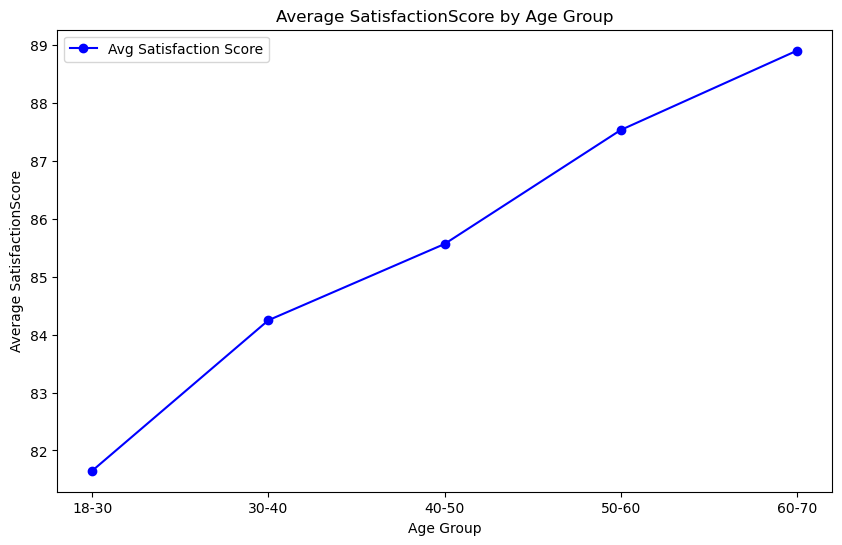

In [8]:
# Age as groups (age bins)
Customer_data['AgeGroup'] = pd.cut(Customer_data['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60-70'])

# Line Plot: Average SatisfactionScore by Age Group
def plot_line(Customer_data):
    """
    Plot a line plot of average SatisfactionScore across age groups.

    Parameters:
    data (DataFrame): The dataset to plot.
    """
    age_group_scores = Customer_data.groupby('AgeGroup')['SatisfactionScore'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(age_group_scores, marker='o', color='blue', label='Avg Satisfaction Score')
    plt.title('Average SatisfactionScore by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Average SatisfactionScore')
    plt.legend()
    plt.show()
    
# Execute the plot
plot_line(Customer_data)

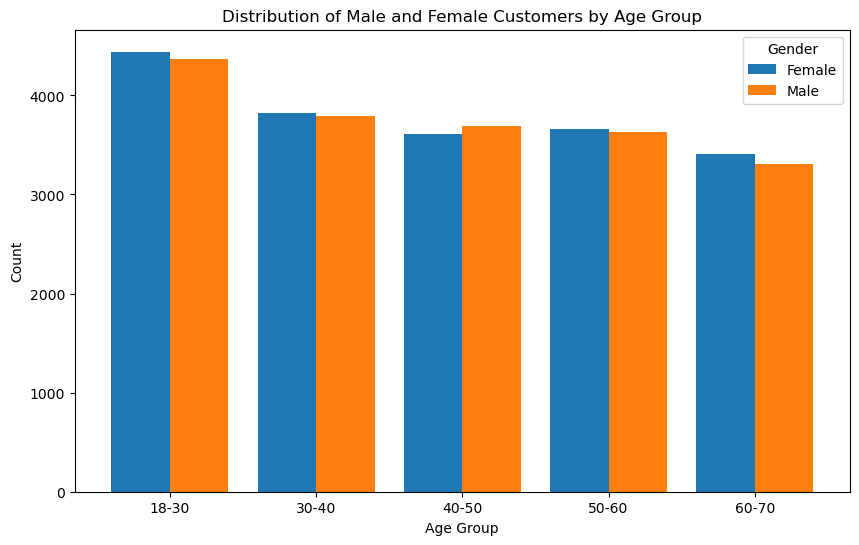

In [9]:
# Bar Plot: Gender Distribution by Age Group
def plot_gender_distribution_by_age(Customer_data, age_column='Age', gender_column='Gender'):
    """
    Plot a grouped bar chart showing the distribution of male and female customers by age group.

    Parameters:
    data (DataFrame): The dataset containing age and gender information.
    age_column (str): The name of the column containing age data. Default is 'Age'.
    gender_column (str): The name of the column containing gender data. Default is 'Gender'.
    """
    # Group by AgeGroup and Gender, then count occurrences
    age_gender_counts = Customer_data.groupby(['AgeGroup', gender_column]).size().unstack()

    # Plotting
    age_gender_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Distribution of Male and Female Customers by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Gender')
    plt.show()

# Execute the plot
plot_gender_distribution_by_age(Customer_data, age_column='Age', gender_column='Gender')

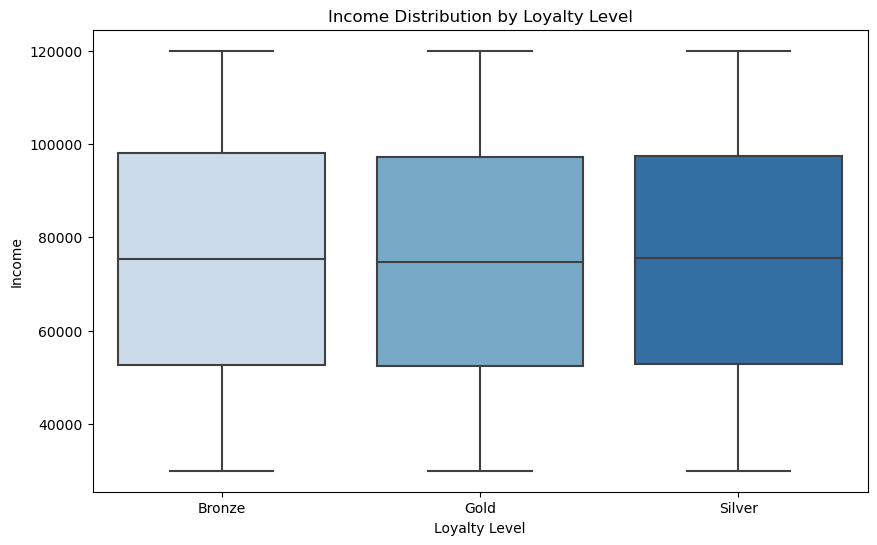

In [10]:
# Box Plot: Income Distribution by Loyalty Level
def plot_box(Customer_data):
    """
    Plot a box plot showing the distribution of Income for each Loyalty Level.

    Parameters:
    data (DataFrame): The dataset to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='LoyaltyLevel', y='Income', data=Customer_data, palette='Blues')  
    plt.title('Income Distribution by Loyalty Level')
    plt.xlabel('Loyalty Level')
    plt.ylabel('Income')
    plt.show()

# Execute the plot
plot_box(Customer_data)   